In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.lines import Line2D  
# %matplotlib qt
np.random.seed(5)

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.lines import Line2D  
# %matplotlib qt
def surf_plot(dist):
    fig, ax = plt.subplots(subplot_kw = {"projection": "3d"}, figsize = (12, 8))

    X = np.arange(0, len(dist), 1)
    Y = np.arange(0, len(dist[0]), 1)
    X, Y = np.meshgrid(X, Y)
    surf = ax.plot_surface(X, Y, dist, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

    plt.gca().invert_yaxis()
    plt.show()
    
def level(x, q):
    lev = np.round(x * q)
    if(lev < q):
         lev += 1;
    return int(lev) - 1

def shp(a):
    print(a.shape)
    
def plot(mapp,numOfClasses,it,updatedOrder):
#     print("sda")
    global nodes
#     print(mapp.shape,mapp)
    # Supports upto 15 classes
    markers = [x[0] for x in list(Line2D.filled_markers)]
    fig = plt.figure()
    ax = fig.add_subplot()
    x = [-1, -1, nodes, nodes]
    y = [-1, nodes, -1,nodes]
    ax.scatter(x, y, marker = '.', color = 'none')
    colors = "bgrcmykw"
    colorToClass={}
    j=0
    for i in range(3):
        ind = np.argwhere(mapp == (i + 1))
        x = [t[0] for t in ind]
        y = [t[1] for t in ind]
        ax.scatter(x, y, color = colors[j], marker = markers[i], label = str(i))
        colorToClass[(i+1)]=colors[j]
        j+=1
    for i in updatedOrder:
        ax.scatter(i["x"], i["y"],marker='x', color = colorToClass[i["class"]] , linewidths=2)

def R2P(x):
    return abs(x), np.angle(x)    

In [3]:
# All hyperparameters of the algorithm

# Input data
num_features = 4

num_samples = 150
q = 10
sim_input = 0.2
# q = 15
# sim_input = 0.2
size_train = 30
size_test = 120

# SOM hyperparameters
d = 500 # dimnesionaliy of hypervectors

sim_nodes = 0.1  #0.1
nodes = 30
nodes_tot = nodes * nodes

alp = 0.15
thr_update = 0.3
it = 100

In [4]:
# Represent inputs into hypervectors with  similarity preserving encoding
hd_prev = 2 * np.pi * np.random.rand(num_features, d) # random angles - base vector for fractional binding
hd_prev = 1 * np.exp(1j * hd_prev) # create a phasor vector

# create four mapping functions one per feature
hd_map_f1 = np.repeat([hd_prev[0]], q, 0)
hd_map_f1 = np.power((hd_map_f1.T), (sim_input * np.arange(1, q + 1))).T

hd_map_f2 = np.repeat([hd_prev[1]], q, 0)
hd_map_f2 = np.power((hd_map_f2.T), (sim_input * np.arange(1, q + 1))).T

hd_map_f3 = np.repeat([hd_prev[2]], q, 0)
hd_map_f3 = np.power((hd_map_f3.T), (sim_input * np.arange(1, q + 1))).T

hd_map_f4 = np.repeat([hd_prev[3]], q, 0)
hd_map_f4 = np.power((hd_map_f4.T), (sim_input * np.arange(1, q + 1))).T

In [5]:
# Read IRIS data
data = np.genfromtxt('Data/Iris/iris_data_012.csv', delimiter=',')[1:]

In [6]:
len_tr = len(data) # length of testing data
TR_L = data[:, -1] # training data labels
TR_D = data[:, :-1];
meanPoint = TR_D.mean(axis = 0)

# subtract mean point
TR_D -= meanPoint

In [7]:
# Scale data  and split into classes

min_ = np.min(TR_D, axis = 0);
max_ = np.max(TR_D, axis = 0);

TR_D[:, 0] = (TR_D[:, 0] - min_[0]) / (max_[0] - min_[0])
TR_D[:, 1] = (TR_D[:, 1] - min_[1]) / (max_[1] - min_[1])
TR_D[:, 2] = (TR_D[:, 2] - min_[2]) / (max_[2] - min_[2])
TR_D[:, 3] = (TR_D[:, 3] - min_[3]) / (max_[3] - min_[3])

class_1 = TR_D[TR_L == 0, :]
class_2 = TR_D[TR_L == 1, :]
class_3 = TR_D[TR_L == 2, :]

In [8]:
# Encode feature vectors per class

class_1_hd = np.zeros((50, d), np.cfloat)
class_2_hd = np.zeros((50, d), np.cfloat)
class_3_hd = np.zeros((50, d), np.cfloat)

for i in range(50):
    cl_1 = hd_map_f1[level(class_1[i, 0], q), :] * hd_map_f2[level(class_1[i, 1], q), :] * hd_map_f3[level(class_1[i, 2], q), :] * hd_map_f4[level(class_1[i, 3], q), :]
    cl_2 = hd_map_f1[level(class_2[i, 0], q), :] * hd_map_f2[level(class_2[i, 1], q), :] * hd_map_f3[level(class_2[i, 2], q), :] * hd_map_f4[level(class_2[i, 3], q), :]
    cl_3 = hd_map_f1[level(class_3[i, 0], q), :] * hd_map_f2[level(class_3[i, 1], q), :] * hd_map_f3[level(class_3[i, 2], q), :] * hd_map_f4[level(class_3[i, 3], q), :]

    class_1_hd[i, :] = cl_1
    class_2_hd[i, :] = cl_2
    class_3_hd[i, :] = cl_3

In [9]:
# Prepare data

# clear TR_D_HD;
length = 150;

D_tmp = np.concatenate((class_1_hd, class_2_hd, class_3_hd), axis = 0)
TR_L_tmp = np.concatenate((TR_L[TR_L == 0], TR_L[TR_L == 1], TR_L[TR_L == 2]), axis = 0)

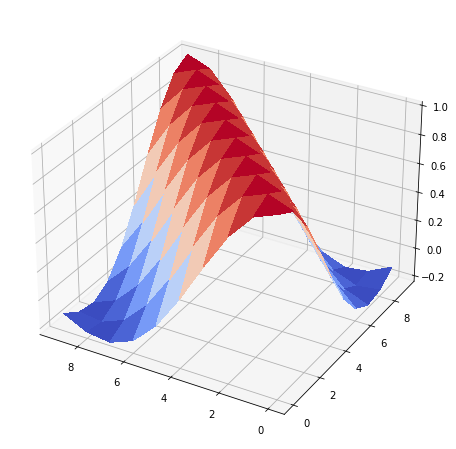

In [10]:
# check cosine similarity of feature maps plot heat map

dist = np.real(np.matmul(hd_map_f1, np.conj(hd_map_f1).T)) / d;
surf_plot(dist)

C:\Users\HyperSeed\anaconda3\envs\phd\lib\site-packages\numpy\core\_asarray.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)


<AxesSubplot:title={'center':'Inter class Similarity'}>

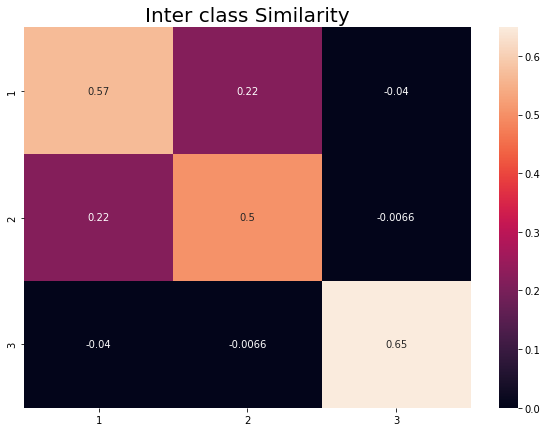

In [11]:
numClasses=3
classes = [[] for _ in range(numClasses)]
for i in range(len(D_tmp)):
#     print(TR_L_perm[i])
    classes[int(TR_L_tmp[i])-1].append(D_tmp[i])
# cosineSimiliraty\
from scipy.spatial import distance
dist=np.zeros((numClasses,numClasses))
for i in range(numClasses):
    for j in range(numClasses):
        dist[i][j]=1-distance.cdist(classes[i],classes[j], 'cosine').mean(axis=1).mean()
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(dist, index = [i for i in "".join(map(str,range(1,numClasses+1)))],
                  columns = [i for i in "".join(map(str,range(1,numClasses+1)))])
plt.figure(figsize = (10,7))
plt.title("Inter class Similarity", fontsize =20)

sn.heatmap(df_cm, annot=True, vmin=0, vmax=np.amax(dist))

C:\Users\HyperSeed\anaconda3\envs\phd\lib\site-packages\numpy\core\_asarray.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)


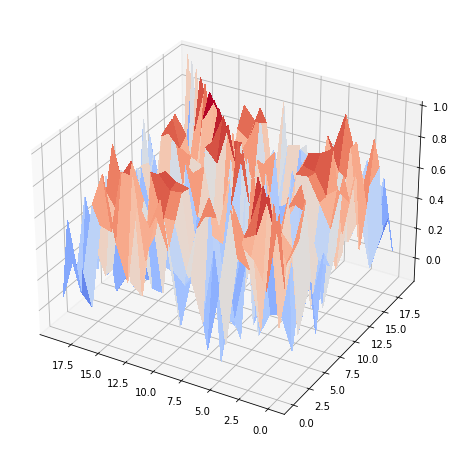

In [12]:
# check cosine similarity of feature maps plot heat map
# %matplotlib qt
DIST = np.zeros((20, 20));
for i in range(20):
    for j in range(20):
        DIST[i][j]= 1-distance.cdist([class_3_hd[i]],[class_3_hd[j]], 'cosine') #cosineSimiliraty(class1[i],class2[j]).real
surf_plot(DIST)

In [13]:
# Generate 2D map
# Reformat node ids - linear array of ids and array of coordinates for searching

X = 2 * np.pi * np.random.rand(1, d) # random angles
X = 1 * np.exp(1j * X) # create a phasor vector

Y = 2 * np.pi * np.random.rand(1, d) # random angles
Y = 1 * np.exp(1j * Y) # create a phasor vector
HDindReverse={}
HDind = np.zeros((nodes_tot, d), np.cfloat)
HDind_coord = np.zeros((nodes_tot, 2), float)
cnt = 0
for i in range(nodes ):
    for j in range(nodes):
        tmp = np.power(X, (sim_nodes * i)) * np.power(Y, (sim_nodes * j))
        HDind[cnt] = tmp;
        HDind_coord[cnt][0] = i
        HDind_coord[cnt][1] = j
        HDindReverse[(i,j)]=cnt
        cnt += 1

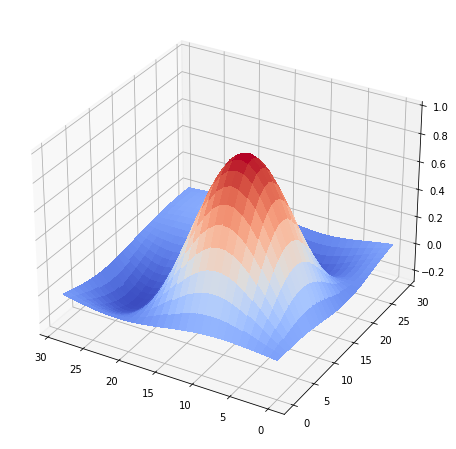

In [14]:
# Visualize results for similarity between the nodes

DIST = np.zeros((nodes, nodes));
point = [10, 10]; # point of focus for visualization
ind = np.nonzero([np.all(val == point) for val in HDind_coord]); 
dp = np.real(np.matmul(HDind, np.conj(HDind[ind]).T)) / d; # cosine similarity between hypervectors of nodes 

cnt = 0;
for i in range(nodes):
    for j in range(nodes):
        DIST[i][j] = dp[cnt]
        cnt += 1
    
surf_plot(DIST)

In [15]:
np.random.seed(4)
# SOM = np.zeros((1,d)) #1 * np.exp(1j * (2 * np.pi * np.random.rand(1, d))) # random initialization of the hypervector of SOM state
SOM = 1 * np.exp(1j * (2 * np.pi * np.random.rand(1, d))) # random initialization of the hypervector of SOM state
[rho,theta] = R2P(SOM);        
SOM = 1 * np.exp(1j *theta)
SOM_SAVED = SOM.copy()

In [16]:
bmuInds=[]
bmuInds.append(HDindReverse[(15,15)])
bmuInds.append(HDindReverse[(20,20)])
bmuInds.append(HDindReverse[(10,10)])
bmuInds.append(HDindReverse[(5,5)])
bmuInds.append(HDindReverse[(25,25)])
bmuInds.append(HDindReverse[(25,5)])


In [17]:
np.random.seed(11)
SOM = SOM_SAVED.copy()

In [18]:
import seaborn as sn
import pandas as pd
def train(SOM,TR_perm,TR_L_perm,bmuInds,num_of_classes,ITERATIONS):
    jj=0
    ## number of iterations (Actually number of updates)
    itr=ITERATIONS#num_of_classes*3# (num_of_classes*2//3)
    beta=1
    updatedOrder=[]
    while(jj<itr):
        itrUpdate={}
        size_observe=30
#         size_observe = (jj+1)*3
#         np.random.seed(15)
        ind_shuffled1 = np.random.permutation(len(TR_perm))

        arr=[]
        meanDist=[]
        for j in range(size_observe):
            
            ## pick a random sample from training set
            hd_new=TR_perm[ind_shuffled1[j]]
            Ibmu1 = SOM * np.conj(hd_new)
            ### find the best matching ind
            dist= 1-distance.cdist(Ibmu1,HDind, 'cosine')
            ## maxi is the maximum similarity for the random sample
#             dist2= 1-distance.cdist([hd_new],[TR_perm[141]], 'cosine')
            maxi, bmu_ind1 = np.max(dist), np.argmax(dist)
#             print(HDind_coord[bmu_ind1],maxi,dist2,ind_shuffled1[j])
            ### store the similarity as well as random sample index 
            arr.append([maxi,ind_shuffled1[j],bmu_ind1])
            meanDist.append(maxi)
        MEAN=np.array(meanDist).mean()

        arr=sorted(arr)
        ### Select BMU - sample with the minium similarity in the current  subset for the given iteration
        ID =  arr[0][1]
        HD_NEW =TR_perm[ID]
        # print(TR_L_perm[ID])
        bmu_ind = bmuInds[jj]# np.random.randint(0, 10000)
#         print(HDind_coord[bmu_ind],ID)
        delta = HDind[bmu_ind] * HD_NEW
    
        SOM = SOM +delta#*0.4
        X,Y = HDind_coord[bmu_ind]
        itrUpdate['x']=X
        itrUpdate['y']=Y
        itrUpdate['class']=TR_L_perm[ID]
        updatedOrder.append(itrUpdate)
        jj+=1
    # print()
    return [SOM,updatedOrder]
def label(SOM,TR_perm,TR_L_perm,nodes,HDind_coord,numOfClasses,it,updatedOrder):
    labelMap={}
    for k in range(len(TR_perm)):
        hd_new = TR_perm[k, :];
        #Ibmu - hypervector for Index of Best Matching Unit
        Ibmu = SOM * np.conj(hd_new); 
        dist= 1-distance.cdist(Ibmu,HDind, 'cosine')
        maxi, bmu_ind = np.max(dist), np.argmax(dist)
#         print(HDind_coord[bmu_ind],maxi)
        inds= (HDind_coord[bmu_ind][0],HDind_coord[bmu_ind][1])
        if(inds in labelMap):
            labelMap[inds].append(TR_L_perm[k])
        else:
            labelMap[inds]=[TR_L_perm[k]]
#     print(labelMap)
#     labelMap={}
    for i in labelMap:
        a = np.array(labelMap[i])
        counts = np.bincount(a)
        labelMap[i]=np.argmax(counts)
    hmappAll = np.zeros((nodes, nodes), int)
    for x in labelMap:
        hmappAll[int(x[0])][int(x[1])]=labelMap[x]
    labelIndexList=[]
    for i in labelMap:
        labelIndexList.append(HDindReverse[i])
    return [labelMap,labelIndexList]
def labelTest(SOM,TS_D_perm,TS_L_perm,nodes,HDind_coord,updatedOrder):
    labelMap={}
    for k in range(len(TS_D_perm)):
        hd_new = TS_D_perm[k, :];
        #Ibmu - hypervector for Index of Best Matching Unit
        Ibmu = SOM * np.conj(hd_new); 
        dist= 1-distance.cdist(Ibmu,HDind, 'cosine')
        maxi, bmu_ind = np.max(dist), np.argmax(dist)
        inds= (HDind_coord[bmu_ind][0],HDind_coord[bmu_ind][1])
        if(inds in labelMap):
            labelMap[inds].append(TS_L_perm[k])
        else:
            labelMap[inds]=[TS_L_perm[k]]

    for i in labelMap:
        a = np.array(labelMap[i])
        counts = np.bincount(a)
        labelMap[i]=np.argmax(counts)
    hmappAll = np.zeros((nodes, nodes), int)
    for x in labelMap:
        hmappAll[int(x[0])][int(x[1])]=labelMap[x]

    
def test(SOM,TS_D_perm,TS_L_perm,labelMap,numOfClasses,it,nodes,neighbourhood,hitList,labelIndexList):   
    ITER = np.zeros((numOfClasses,numOfClasses)) 
    for k in range(len(TS_D_perm)):
        hd_new = TS_D_perm[k, :];
        #Ibmu - hypervector for Index of Best Matching Unit
        Ibmu = SOM * np.conj(hd_new); 
        dist= 1-distance.cdist(Ibmu,hitList, 'cosine')
        maxi, bmu_ind = np.max(dist), labelIndexList[np.argmax(dist)]

        inds= (HDind_coord[bmu_ind][0],HDind_coord[bmu_ind][1])
        if(inds in labelMap):

            ITER[TS_L_perm[k]-1][labelMap[inds]-1]+=1
        else:
            assert(1==0)

            
    df_cm = pd.DataFrame(ITER, index = [i for i in map(str,range(1,numOfClasses+1))],
              columns = [i for i in map(str,range(1,numOfClasses+1))])
    accuracy = sum([ITER[i][i] for i in range(numOfClasses)])/len(TS_D_perm)
    return   [ITER ,     accuracy]  

In [19]:
from csv import writer
def append_list_as_row(file_name, list_of_elem):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem) 
neighbourhood=3
header = ["# of Iterations"]+ ["It-"+str(i) for i in range(1,9)]

append_list_as_row('Results/results_iris_IterationsVSAccuracy.csv', header)

numOfClasses=3

for itrs in range(1,7):
    ITERATIONS= itrs

    it=1
    accs=[]
    neighbourhood = 0
    seeds= range(15) 

    for i in range(8):
        np.random.seed(seeds[i])
        inds = np.random.permutation(length)
        D_HD_PERM = D_tmp[inds, :]

        ###### rounding up the input vectors
        # D_HD_PERM = roundComplexVector(D_HD_PERM,decimals)

        L_perm = TR_L_tmp[inds].reshape(TR_L.shape[0], 1) # ?
        size_train=50
        TR_perm = D_HD_PERM[: size_train, :]
        TR_L_perm = L_perm[: size_train]

        TS_D_perm = D_HD_PERM[size_train: , :]
        TS_L_perm = L_perm[size_train: , :]

        TR_L_perm=np.array([int(i[0]) for i in TR_L_perm])+1
        TS_L_perm=np.array([int(i[0]) for i in TS_L_perm])+1

        D_TMP = TR_perm.copy()
        L_PERM = TR_L_perm.copy()

        D_T_TMP = TS_D_perm.copy()
        L_T_PERM = TS_L_perm.copy() 




        inds1=np.random.permutation(len(D_TMP))
        inds2=np.random.permutation(len(D_T_TMP))
        TR_perm,TR_L_perm=D_TMP[inds1],L_PERM[inds1]
        TS_D_perm,TS_L_perm=D_T_TMP[inds2],L_T_PERM[inds2]
        SOM = SOM_SAVED.copy()
        SOM,updatedOrder =train(SOM,TR_perm,TR_L_perm,bmuInds,numOfClasses,ITERATIONS)
        labelMap,labelIndexList = label(SOM,TR_perm,TR_L_perm,nodes,HDind_coord,numOfClasses,it,updatedOrder)
        hitList = [HDind[j] for j in labelIndexList]
        labelTest(SOM,TS_D_perm,TS_L_perm,nodes,HDind_coord,updatedOrder)
        ITER,acc =test(SOM,TS_D_perm,TS_L_perm,labelMap,numOfClasses,it,nodes,neighbourhood,hitList,labelIndexList)
        accs.append([acc,it])

        it+=1
    accss=[iii[0] for iii in accs]
    data=[itrs]+accss
    accs =sorted(accs)
    append_list_as_row('Results/results_iris_IterationsVSAccuracy.csv', data)
    # print("Number of classes, ", numOfClasses)  
    print("Number of updates : "+str(ITERATIONS)+", Train size :",size_train," max accuracy", np.array(accss).max()," Mean accuracy", np.array(accss).mean())  


Number of updates : 1, Train size : 50  max accuracy 0.88  Mean accuracy 0.84375
Number of updates : 2, Train size : 50  max accuracy 0.92  Mean accuracy 0.82375
Number of updates : 3, Train size : 50  max accuracy 0.97  Mean accuracy 0.8825000000000001
Number of updates : 4, Train size : 50  max accuracy 0.98  Mean accuracy 0.8962500000000001
Number of updates : 5, Train size : 50  max accuracy 0.97  Mean accuracy 0.92
Number of updates : 6, Train size : 50  max accuracy 0.95  Mean accuracy 0.9075


In [20]:
import pandas as pd
df = pd.read_csv('Results/results_iris_IterationsVSAccuracy.csv')

In [21]:
D=df.to_dict(orient='records')

In [22]:
dic={}
for i in range(len(D)):
    dic[D[i]['# of Iterations']]=[]
    for j in range(1,9):
        dic[D[i]['# of Iterations']].append(D[i]["It-"+str(j)])
    dic[D[i]['# of Iterations']]=np.array(dic[D[i]['# of Iterations']])
df1=pd.DataFrame(dic)
df1.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True, interpolation='midpoint')
df2=df1.describe()
labels = list(df2.columns)

# create dictionaries for each column as items of a list
# bxp_stats = df2.apply(lambda x: {'med':x["50%"], 'q1':x["25%"], 'q3':x["75%"]}, axis=0).tolist()
bxp_stats = df2.apply(lambda x: {'med':x["50%"], 'q1':x["25%"], 'q3':x["75%"], 'whislo':x['min'], 'whishi':x['max']}, axis=0).tolist()


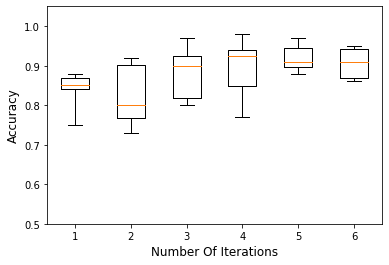

In [24]:
for index, item in enumerate(bxp_stats):
    item.update({'label':labels[index]})

_, ax = plt.subplots()
ax.bxp(bxp_stats, showfliers=False);
ax.set_ylim([0.5, 1.05])
plt.xlabel('Number Of Iterations', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()